In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from typing import KeysView
from mlxtend.plotting import plot_confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn import svm

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/ML/EX1/part1/train.csv")

In [ ]:
Y = data['price_range']
X = data.drop(columns='price_range')

In [ ]:
def forward_selection(x, y):
  features_list = x.columns.tolist().copy()
  k = len(features_list)
  best_features = list()
  models = dict()
  iters = 0
  for i in range(k):
    last_score = 0
    last_feature = None
    iters += 1

    for feature in set(features_list) - set(best_features):
      X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2)
      test_features = best_features.copy()
      test_features.append(feature)
      
      model1 = LogisticRegression()
      model1.fit(X_train[test_features], Y_train)
      pred_prob = model1.predict_proba(X_test[test_features])
      auc_score = roc_auc_score(Y_test, pred_prob[:,1])
      if last_score <= auc_score:
        last_feature = feature
        last_score = auc_score

    best_features.append(last_feature)
    print(best_features, i)
    models[iters] = last_score, best_features.copy()
    features_list.remove(last_feature)
    
  return models

In [ ]:
Y_temp = Y.replace([1, 2, 3], [0, 1, 1])

In [ ]:
best_forward_features = forward_selection(X, Y_temp)

['ram'] 0
['ram', 'battery_power'] 1
['ram', 'battery_power', 'px_height'] 2
['ram', 'battery_power', 'px_height', 'px_width'] 3
['ram', 'battery_power', 'px_height', 'px_width', 'sc_h'] 4


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


['ram', 'battery_power', 'px_height', 'px_width', 'sc_h', 'int_memory'] 5


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


['ram', 'battery_power', 'px_height', 'px_width', 'sc_h', 'int_memory', 'mobile_wt'] 6


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


['ram', 'battery_power', 'px_height', 'px_width', 'sc_h', 'int_memory', 'mobile_wt', 'm_dep'] 7


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


['ram', 'battery_power', 'px_height', 'px_width', 'sc_h', 'int_memory', 'mobile_wt', 'm_dep', 'clock_speed'] 8


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


['ram', 'battery_power', 'px_height', 'px_width', 'sc_h', 'int_memory', 'mobile_wt', 'm_dep', 'clock_speed', 'pc'] 9


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


['ram', 'battery_power', 'px_height', 'px_width', 'sc_h', 'int_memory', 'mobile_wt', 'm_dep', 'clock_speed', 'pc', 'talk_time'] 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


['ram', 'battery_power', 'px_height', 'px_width', 'sc_h', 'int_memory', 'mobile_wt', 'm_dep', 'clock_speed', 'pc', 'talk_time', 'four_g'] 11


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


['ram', 'battery_power', 'px_height', 'px_width', 'sc_h', 'int_memory', 'mobile_wt', 'm_dep', 'clock_speed', 'pc', 'talk_time', 'four_g', 'sc_w'] 12


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


['ram', 'battery_power', 'px_height', 'px_width', 'sc_h', 'int_memory', 'mobile_wt', 'm_dep', 'clock_speed', 'pc', 'talk_time', 'four_g', 'sc_w', 'n_cores'] 13


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


['ram', 'battery_power', 'px_height', 'px_width', 'sc_h', 'int_memory', 'mobile_wt', 'm_dep', 'clock_speed', 'pc', 'talk_time', 'four_g', 'sc_w', 'n_cores', 'blue'] 14


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


['ram', 'battery_power', 'px_height', 'px_width', 'sc_h', 'int_memory', 'mobile_wt', 'm_dep', 'clock_speed', 'pc', 'talk_time', 'four_g', 'sc_w', 'n_cores', 'blue', 'touch_screen'] 15


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


['ram', 'battery_power', 'px_height', 'px_width', 'sc_h', 'int_memory', 'mobile_wt', 'm_dep', 'clock_speed', 'pc', 'talk_time', 'four_g', 'sc_w', 'n_cores', 'blue', 'touch_screen', 'wifi'] 16


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


['ram', 'battery_power', 'px_height', 'px_width', 'sc_h', 'int_memory', 'mobile_wt', 'm_dep', 'clock_speed', 'pc', 'talk_time', 'four_g', 'sc_w', 'n_cores', 'blue', 'touch_screen', 'wifi', 'fc'] 17


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


['ram', 'battery_power', 'px_height', 'px_width', 'sc_h', 'int_memory', 'mobile_wt', 'm_dep', 'clock_speed', 'pc', 'talk_time', 'four_g', 'sc_w', 'n_cores', 'blue', 'touch_screen', 'wifi', 'fc', 'three_g'] 18
['ram', 'battery_power', 'px_height', 'px_width', 'sc_h', 'int_memory', 'mobile_wt', 'm_dep', 'clock_speed', 'pc', 'talk_time', 'four_g', 'sc_w', 'n_cores', 'blue', 'touch_screen', 'wifi', 'fc', 'three_g', 'dual_sim'] 19


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
best_forward_features

{1: (0.9727250000000001, ['ram']),
 2: (0.9929680411331787, ['ram', 'battery_power']),
 3: (0.9978195488721805, ['ram', 'battery_power', 'px_height']),
 4: (0.9998998773497535, ['ram', 'battery_power', 'px_height', 'px_width']),
 5: (1.0, ['ram', 'battery_power', 'px_height', 'px_width', 'sc_h']),
 6: (0.9998999974999374,
  ['ram', 'battery_power', 'px_height', 'px_width', 'sc_h', 'int_memory']),
 7: (0.9998748873986588,
  ['ram',
   'battery_power',
   'px_height',
   'px_width',
   'sc_h',
   'int_memory',
   'mobile_wt']),
 8: (0.9791916766706683,
  ['ram',
   'battery_power',
   'px_height',
   'px_width',
   'sc_h',
   'int_memory',
   'mobile_wt',
   'm_dep']),
 9: (0.9706720672067206,
  ['ram',
   'battery_power',
   'px_height',
   'px_width',
   'sc_h',
   'int_memory',
   'mobile_wt',
   'm_dep',
   'clock_speed']),
 10: (0.9735261735562005,
  ['ram',
   'battery_power',
   'px_height',
   'px_width',
   'sc_h',
   'int_memory',
   'mobile_wt',
   'm_dep',
   'clock_speed',
 

In [ ]:
forward_x = 0
forward_features = None
for i,j in best_forward_features.items():
  h,k = j
  if forward_x <= h:
    forward_x = h
    forward_features = k

print('score:',forward_x)
print('features:', forward_features)

score: 1.0
features: ['ram', 'battery_power', 'px_height', 'px_width', 'sc_h']


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_temp, test_size=0.2)

In [ ]:
model = LogisticRegression()
model.fit(X_train[forward_features], Y_train)
print(classification_report(Y_test, model.predict(X_test[forward_features])))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       208
           1       0.99      0.99      0.99       192

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



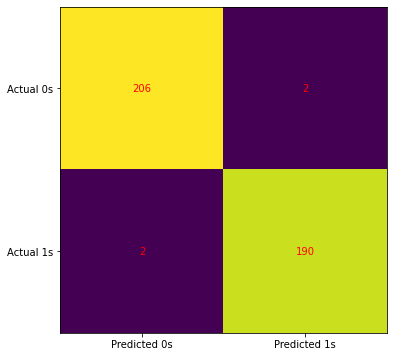

In [ ]:
cm = confusion_matrix(Y_test, model.predict(X_test[forward_features]))

fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()  

In [ ]:
sc = StandardScaler()
 
standard_X_train = sc.fit_transform(X_train)
standard_X_test = sc.transform(X_test)

In [ ]:
pca = PCA(n_components=len(forward_features))
pca.fit(standard_X_train)

pca_train = pca.transform(standard_X_train)
pca_test = pca.transform(standard_X_test)

In [ ]:
pca_model = LogisticRegression()
pca_model.fit(pca_train, Y_train)
print(classification_report(Y_test, pca_model.predict(pca_test)))

              precision    recall  f1-score   support

           0       0.57      0.52      0.54       208
           1       0.52      0.57      0.54       192

    accuracy                           0.54       400
   macro avg       0.54      0.54      0.54       400
weighted avg       0.54      0.54      0.54       400



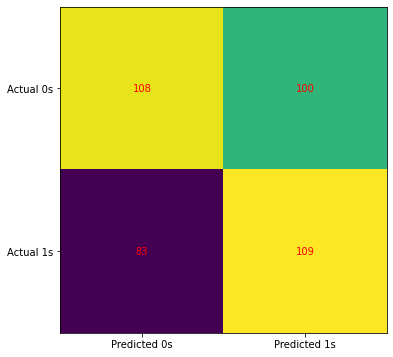

In [ ]:
cm = confusion_matrix(Y_test, pca_model.predict(pca_test))

fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()  

In [ ]:
data['battery_power'].describe()

count    2000.000000
mean     1238.518500
std       439.418206
min       501.000000
25%       851.750000
50%      1226.000000
75%      1615.250000
max      1998.000000
Name: battery_power, dtype: float64

In [ ]:
cut_labels = [0, 1, 2]
data['battery_bin'] = pd.cut(data['battery_power'], bins=3, labels=cut_labels)

In [ ]:
data.battery_bin.value_counts()

0    697
2    662
1    641
Name: battery_bin, dtype: int64

In [ ]:
Y_bin = data['price_range']
X_bin = data.drop(columns=['price_range', 'battery_power'])

In [ ]:
X_train_bin, X_test_bin, Y_train_bin, Y_test_bin = train_test_split(X_bin, Y_bin, test_size=0.2)

In [ ]:
bin_svm = svm.SVC()
bin_svm.fit(X_train_bin, Y_train_bin)
bin_svm.score(X_test_bin, Y_test_bin)

0.805

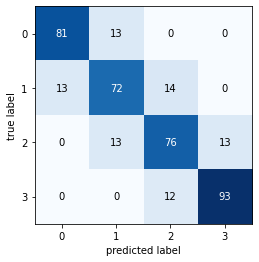

In [ ]:
cm = confusion_matrix(Y_test_bin, bin_svm.predict(X_test_bin))
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

In [ ]:
pd.cut(data['battery_power'], bins=7).value_counts()

(499.503, 714.857]      311
(714.857, 928.714]      297
(1784.143, 1998.0]      287
(1570.286, 1784.143]    277
(928.714, 1142.571]     276
(1142.571, 1356.429]    276
(1356.429, 1570.286]    276
Name: battery_power, dtype: int64

In [ ]:
cut_bins = [min(data['battery_power']), 700, 1000, 1250, 1400, max(data['battery_power'])]
pd.cut(data['battery_power'], bins=cut_bins).value_counts()

(1400, 1998]    794
(700, 1000]     411
(1000, 1250]    326
(501, 700]      284
(1250, 1400]    183
Name: battery_power, dtype: int64

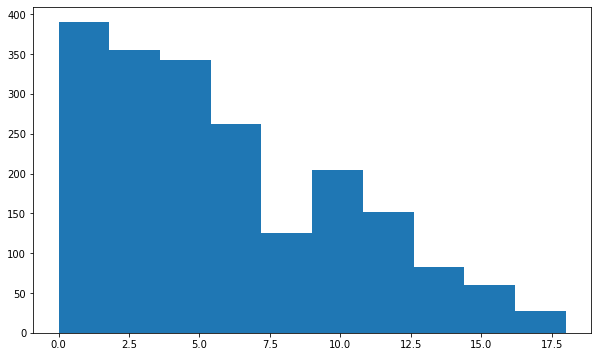

In [ ]:
data.sc_w.hist(grid=False, figsize=(10, 6))

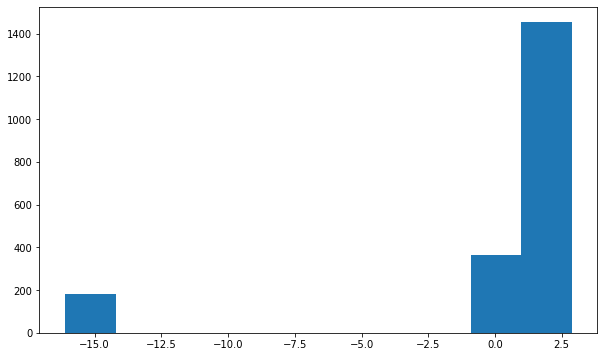

In [ ]:
np.log(data.sc_w + 0.0000001).hist(grid=False, figsize=(10, 6))

In [ ]:
data['log_sc_w'] = np.log(data.sc_w + 0.0000001)
Y_log = data['price_range']
X_log = data.drop(columns=['price_range', 'battery_bin', 'sc_w'])

In [ ]:
X_train_log, X_test_log, Y_train_log, Y_test_log = train_test_split(X_log, Y_log, test_size=0.2)

In [ ]:
log_svm = svm.SVC()
log_svm.fit(X_train_log, Y_train_log)
log_svm.score(X_test_log, Y_test_log)

0.94

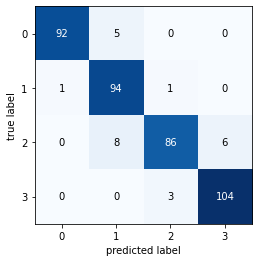

In [ ]:
cm = confusion_matrix(Y_test_log, log_svm.predict(X_test_log))
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

In [ ]:
data['volume'] = data.m_dep * data.sc_h * data.sc_w

In [ ]:
Y_volume = data['price_range']
X_volume = data.drop(columns=['price_range', 'battery_bin', 'log_sc_w'])

In [ ]:
X_train_volume, X_test_volume, Y_train_volume, Y_test_volume = train_test_split(X_volume, Y_volume, test_size=0.2)

In [ ]:
volume_svm = svm.SVC()
volume_svm.fit(X_train_volume, Y_train_volume)
volume_svm.score(X_test_volume, Y_test_volume)

0.95

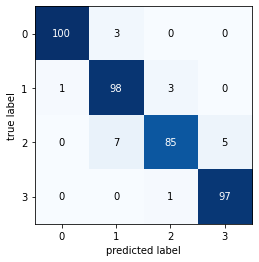

In [ ]:
cm = confusion_matrix(Y_test_volume, volume_svm.predict(X_test_volume))
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

In [ ]:
categorical_features = []
for feature in data.columns.to_list():
  if ( len(data[feature].unique()) < 4 ):
    categorical_features.append(feature)

categorical_features

['blue',
 'dual_sim',
 'four_g',
 'three_g',
 'touch_screen',
 'wifi',
 'battery_bin']

In [ ]:
data = pd.get_dummies(data, columns=categorical_features, prefix=categorical_features)

In [ ]:
data

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,...,four_g_1,three_g_0,three_g_1,touch_screen_0,touch_screen_1,wifi_0,wifi_1,battery_bin_0,battery_bin_1,battery_bin_2
0,842,2.2,1,7,0.6,188,2,2,20,756,...,0,1,0,1,0,0,1,1,0,0
1,1021,0.5,0,53,0.7,136,3,6,905,1988,...,1,0,1,0,1,1,0,0,1,0
2,563,0.5,2,41,0.9,145,5,6,1263,1716,...,1,0,1,0,1,1,0,1,0,0
3,615,2.5,0,10,0.8,131,6,9,1216,1786,...,0,0,1,1,0,1,0,1,0,0
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,...,1,0,1,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,0.5,0,2,0.8,106,6,14,1222,1890,...,1,0,1,0,1,1,0,1,0,0
1996,1965,2.6,0,39,0.2,187,4,3,915,1965,...,0,0,1,0,1,0,1,0,0,1
1997,1911,0.9,1,36,0.7,108,8,3,868,1632,...,1,0,1,0,1,1,0,0,0,1
1998,1512,0.9,4,46,0.1,145,5,5,336,670,...,1,0,1,0,1,0,1,0,0,1


In [ ]:
Y_one_hot = data['price_range']
X_one_hot = data.drop(columns=['price_range', 'battery_bin_0', 'battery_bin_1', 'battery_bin_2', 'log_sc_w', 'volume'])

In [ ]:
X_train_one_hot, X_test_one_hot, Y_train_one_hot, Y_test_one_hot = train_test_split(X_one_hot, Y_one_hot, test_size=0.2)

In [ ]:
one_hot_svm = svm.SVC()
one_hot_svm.fit(X_train_one_hot, Y_train_one_hot)
one_hot_svm.score(X_test_one_hot, Y_test_one_hot)

0.955

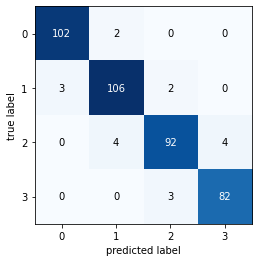

In [ ]:
cm = confusion_matrix(Y_test_one_hot, one_hot_svm.predict(X_test_one_hot))
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

In [ ]:
Y_mix = data['price_range']
X_mix = data.drop(columns='price_range')

In [ ]:
X_train_mix, X_test_mix, Y_train_mix, Y_test_mix = train_test_split(X_mix, Y_mix, test_size=0.2)

In [ ]:
mix_svm = svm.SVC()
mix_svm.fit(X_train_mix, Y_train_mix)
mix_svm.score(X_test_mix, Y_test_mix)

0.9425

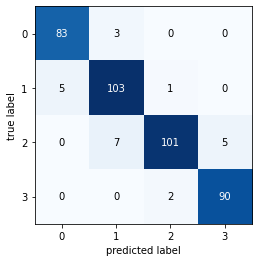

In [ ]:
cm = confusion_matrix(Y_test_mix, mix_svm.predict(X_test_mix))
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

In [ ]:
def backward_selection(x, y):
  best_features = x.columns.tolist().copy()
  k = len(best_features)
  models = dict()
  iters = -1
  for i in range(k):
    last_score = 0
    last_feature = None
    iters += 1

    for feature in set(best_features):
      X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2)
      test_features = best_features.copy()
      test_features.remove(feature)
      
      model1 = LogisticRegression()
      model1.fit(X_train[test_features], Y_train)
      pred_prob = model1.predict_proba(X_test[test_features])
      auc_score = roc_auc_score(Y_test, pred_prob[:,1])
      if last_score <= auc_score:
        last_feature = feature
        last_score = auc_score

    print(best_features, i)
    models[k - iters] = last_score, best_features.copy()
    best_features.remove(last_feature)
    
  return models

In [ ]:
best_backward_features = backward_selection(X, Y_temp)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi'] 0


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'wifi'] 1


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'wifi'] 2


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'wifi'] 3


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


['battery_power', 'blue', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'wifi'] 4


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


['blue', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'wifi'] 5


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


['blue', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'ram', 'sc_h', 'sc_w', 'talk_time', 'wifi'] 6


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


['clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'ram', 'sc_h', 'sc_w', 'talk_time', 'wifi'] 7


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


['clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'ram', 'sc_h', 'talk_time', 'wifi'] 8


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


['clock_speed', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'ram', 'sc_h', 'talk_time', 'wifi'] 9


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


['clock_speed', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'ram', 'sc_h', 'talk_time', 'wifi'] 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


['clock_speed', 'int_memory', 'mobile_wt', 'n_cores', 'pc', 'ram', 'sc_h', 'talk_time', 'wifi'] 11


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


['int_memory', 'mobile_wt', 'n_cores', 'pc', 'ram', 'sc_h', 'talk_time', 'wifi'] 12


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


['int_memory', 'mobile_wt', 'pc', 'ram', 'sc_h', 'talk_time', 'wifi'] 13


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


['int_memory', 'mobile_wt', 'ram', 'sc_h', 'talk_time', 'wifi'] 14
['int_memory', 'mobile_wt', 'ram', 'sc_h', 'wifi'] 15


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


['int_memory', 'ram', 'sc_h', 'wifi'] 16
['int_memory', 'ram', 'wifi'] 17
['ram', 'wifi'] 18


ValueError: ignored

In [ ]:
back_score = 0
back_features = None
for i,j in best_backward_features.items():
  h,k = j
  if back_score <= h:
    back_score = h
    back_features = k

print('score:',back_score)
print('features:', back_features)

In [ ]:
back_model = LogisticRegression()
back_model.fit(X_train[back_features], Y_train)
print(classification_report(Y_test, back_model.predict(X_test[back_features])))